# Lighthouse Part 2
by Matthew Cerep 1/28/25

Now that we know the basics of python, let's use it to do some cool things! This notebook introduces basic functionalities of `numpy` and `matplotlib` and follows with exercises using them.

## NumPy

Scientists often need to run the same basic (and sometimes not-so-basic!) operations across codes. So we don't need to reinvent the wheel every time they come up, we utilize **libraries**. You can make custom libraries (and many do), but there are a handful of standard libriaries that you will see in almost any scientific python code. Perhaps the most essential is a library callesd `NumPy`, which we will go into first.

To use numpy in a code, you first need to `import` it, like this.

In [1]:
import numpy as np  # The "as np" just defines "np" as an abbreviation for "numpy", which is standard in scientific codes

The standard datatype for NumPy is an `array`. It is essentially a `list` of numbers with some handy functionalities to make doing math easier. You create a `NumPy` array like this.

In [2]:
NormalList = [0,1,2,3,4,5] # this is a list

array = np.array(NormalList) # this is that same list as an array

The same indexing tricks we learned for lists work on `NumPy` arrays as well.

In [3]:
print(f"third element of the list: {NormalList[2]}")
print(f"third element of the array: {array[2]}")

third element of the list: 2
third element of the array: 2


One of the most useful features of `arrays` is you can perform mathematical operations on all elements of the `array` at once. For example, if you wanted to divide ever element of a list by 10, you would need a `for` loop, like this.

In [4]:
DivideByTen = [] #initialize

for n in NormalList:
    DivideByTen.append(n/10)

print(DivideByTen)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5]


With `arrays`, we can do the operation to the array itself, like this.

In [5]:
DivideArrayByTen = array/10

print(DivideArrayByTen)

[0.  0.1 0.2 0.3 0.4 0.5]


Other than `arrays`, `NumPy` comes with all of the standard math operations you would want, as well as some useful constants built in!

In [6]:
print(np.cos(0)) #cos(0) = 1

print(np.sin(3*np.pi/2)) # sin(3pi/2) = -1

print(np.log(np.e**2)) # ln(e^2) = 2

1.0
-1.0
2.0


## Matplotlib

Another super useful library you'll often see in scientific codes is `Matplotlib`. Like with `NumPy`, we `import` it like this

In [7]:
import matplotlib.pyplot as plt # again, plt is the standard abbreviation for the library

The most essential function in `Matplotlib` is, as you might have guessed, `plot`. `plot(x,y)` takes in 2 arguments, `x` (the list of x values for your data) and `y` (the corresponding list of y values for your data). Let's plot $y=x^2$ for $0<x<5$ as an example.

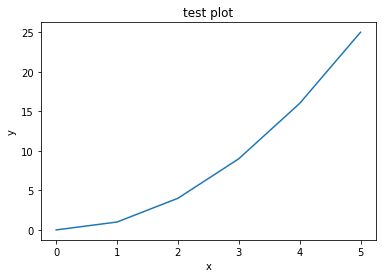

In [8]:
x = [0,1,2,3,4,5]
y = [0,1,4,9,16,25] # y = x^2

plt.plot(x,y)
plt.xlabel("x") # label you x axis with a string like this
plt.ylabel("y") # do the same for y like this
plt.title("test plot") #write a title like this
plt.show() #write this after plot to display it

You may notice that our plot is a bit grainy. This is because we only have 6 data points. To get more, we can take advantage of `NumPy`! The `NumPy` function `linspace(start, end, length)` will return an `array` of `length` numbers from `start` to `end` and is very useful for generating our `x` data set.

In [9]:
newx = np.linspace(0,5,1000) # will give 1000 numbers from 0 and 5

Now that we have our `newx`, we can take advantage of the fact that it's an `array`to generate our `newy` with ease.

In [10]:
newy = newx**2

Now let's plot our larger data set for $y = x^2$.

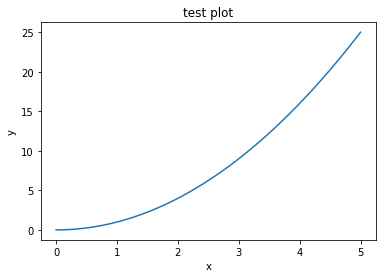

In [11]:
plt.plot(newx,newy)
plt.xlabel("x") # label you x axis with a string like this
plt.ylabel("y") # do the same for y like this
plt.title("test plot") #write a title like this
plt.show() #write this after plot to display it

Much better!

You can also plot multiple data set on the same plot, like this.

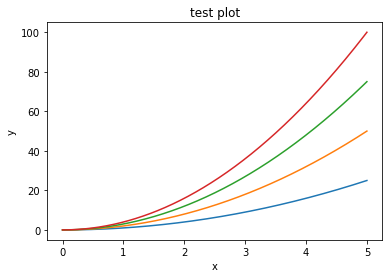

In [12]:
plt.plot(newx,newx**2)
plt.plot(newx, 2*newx**2)
plt.plot(newx, 3*newx**2)
plt.plot(newx, 4*newx**2)
plt.xlabel("x") # label you x axis with a string like this
plt.ylabel("y") # do the same for y like this
plt.title("test plot") #write a title like this
plt.show() #write this after plot to display it

It would be nice to add labels so we know which function is which. It's done so like this.

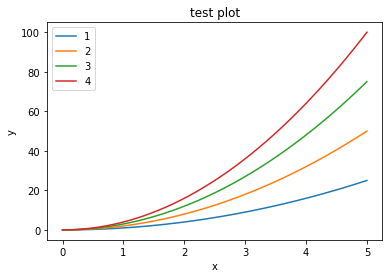

In [13]:
plt.plot(newx,newx**2, label = "1")
plt.plot(newx, 2*newx**2, label = "2")
plt.plot(newx, 3*newx**2, label = "3")
plt.plot(newx, 4*newx**2, label = "4")
plt.xlabel("x") # label you x axis with a string like this
plt.ylabel("y") # do the same for y like this
plt.title("test plot") # write a title like this
plt.legend() # write this to show the legend
plt.show() # write this after plot to display it

## Fibonacci

With these new tools in hand, let's revisit the function you created at the end of the last notebook. You can paste in your own ones if you'd like (and I encourage you to do so!), but below are two example functions from that challenge.

In [14]:
#example solution

def fibonacci(n):
    
    sequence = [0,1]
    i = 1

    if n == 1:
        sequence = [0]
    else:
        while len(sequence)<n:
            newnum = sequence[i-1] + sequence[i]
            sequence.append(newnum)
            i += 1

    return sequence

def fibonnaci_up_to(m):

    sequence = [0,1]
    i = 1

    if m == 1:
        return [0]

    elif m == 2:
        return [0,1,1]

    else:
        while sequence[-1] < m:
            newnum = sequence[i-1] + sequence[i]
            sequence.append(newnum)
            i += 1
        sequence = sequence[:-1]

    return sequence
        

As a reminder, the Fibonacci sequence is a sequence of numbers where each number in the sequence is the sum of the two preceeding numbers, 0,1,1,2,3,5,8,13,21,... . This sequence has the special property that, the higher you go, the closer the ratio of two consecutive numbers gets to a special constant 

\begin{equation}
	\phi = \frac{1 + \sqrt{5}}{2} \approx 1.618033988749\ldots
\end{equation}

called "the golden ratio". Like $\pi$, this number is irrational, with an infinite number of digits after the decimal that do not repeat. Using the tricks we just learned, we are going to prove the Fibonacci sequence has this property!

First, let's state the problem a bit more rigorously to make it clear exactly what we need to do (if this is part is confusing, don't worry, it's not essential for the next steps).

The property of the sequence we described earlier can be recast in the language of mathematics as the following,

\begin{equation}
    \lim_{a \to \infty} \frac{n_{a+1}}{n_{a}} = \phi
\end{equation}

where $n_a$ is the ath digit of the Fibonacci sequence.

Let's walk through proving this. First, set a variable `sequence` as a numpy array containing the first 30 or so digits of the sequence. 

Then, create another array called `sequenceshift` equal to the the original `sequence` array with the first element removed, effectively "shifting" our entire sequence up by one. **Hint** - Use slicing for these next few tasks (discussed in part 1!).

We now have one list with all 30 numbers and one with the last 29 numbers. We are ultimately interested in the ratio of these two sets, so we can use the fact that we can divide `numpy` arrays by each other to accomplish this. However, in order to divide the elements of one array by the elements in another, the arrays must be the same length. To do this, remove the last element from `sequence` (i.e. leave the first 29 numbers). 

Now that the arrays are the same length, dividing the shifted array by the original array will give us the ratio of consecutive numbers in the sequence! One last issue, though. We know the sequence starts as $0,1,1,\ldots$, and so the first ratio would be $\frac{1}{0}$, which isn't a valid operation. To fix this, remove the first element from both arrays.

Now that that issue is avoided, let's finally make an array of the ratios! Define the variable `ratios` that is `sequenceshift` divided by `sequence`.

Now that we have what we are interested in, let's analyze it. Create a `matplotlib` plot of these ratios for each step (hint: you can create your x values using `range(len(ratios))`).

If if there any bugs, you should see that the ratios settle down to a constant value after 5 or so iterations. Let's see if this agrees with our theoretical prediction of $\phi = \frac{1 + \sqrt{5}}{2}$. To help visualize this, you can use the `matplotlib` function `axhline`, which draws a straight line at the y value you specify. Below is that function with the value for our prediction entered in, add it to your plot and see if it agrees!

`plt.axhline(((1 + 5 ** 0.5) / 2), color = "red", linestyle = "--")`

Note, `color = "red"` just specifies a color, and `linestyle = "--"` makes the line dashed.

## Phase Folding

For this next exercise, we are going to utilize some functionalities of `numpy` and `matplotlib` to create and analyze some model pulsar data! This may be fairly challenging, so feel free to ask mentors questions!

**INTRO INFO BY GRAHAM**

First, we need to be able to create a single pulse. To do so, we are going to model it as a Gaussian, or Bell Curve, as you may have heard it called. Mathematically, a Gaussian takes the following form

\begin{equation}
    f(x) = e^{-\frac{(x - \mu)^2}{2\sigma^2}}.
\end{equation}

Where $\mu$ (the Greek letter mu) is the $x$ value the curve is centered at and $\sigma$ (the Greek letter sigma) describes the width of the curve.

**IMAGE SHOWING A GAUSSIAN**

Below, using the equation above, write a function `gaussian(x, mu, sigma)` that takes in the float arguments `x`, the input value, `mu`, the center of the Gaussian, and `sigma`, the spread, and returns the value of the function above those parameters at point `x`. Confirm it works by showing $f(10) \approx 0.135$ if $\mu = 0$ and $\sigma = 5$.

**Hint** - `numpy` has the constant $e$ built into it using `np.e`

Let show that this function has the shape we want. Use `np.linspace` to create an x-axis and use `matplotlib` to plot the function over this interval. Choose values that are most appropriate.

Now that we can create a single pulse, but real pulsar signals come in a series at regular intervals. Let's say we want to mimic the signal from a pulsar with a period of $T = 0.5$ seconds observed over a $10$ second period, where a data point is recorded ever $0.01$ seconds. Define the variables `start`, `end`, `period`, and `sampletime` (the sampling rate, i.e. the spacing between the numbers) below, assuming we start at $0$ seconds.

Now let's make our time axis. Use `np.linspace(start,end,step)` to do this, and name the resulting numpy array `times`. Instead of an integer, first define `steps` as a variable that combines `start`, `end`, and `rate` to find the correct number of steps. **Hint** - you can use `int(float)` to turn floats into integers, like `int(2.5) = 2`. You will need to do this to make sure `steps` is and integer value.

Now let's think about the pulses themselves. We have two values we can adjust, $\mu$ and $\sigma$. What would we make them?

$\sigma$ defines the width of the pulse. Pulsar pulses are very steep, so we want `sigma` to be thin. This means we want to choose a value much less than the period. Any sufficiently small number will do, and you're free to play with this later, but for now let's use $\sigma = \frac{T}{10}$ where $T$ is the period. Set `sigma` appropriately below.

$\mu$ is a but trickier. It defines where the pulse is centered at, so it makes sense that we will want to use some multiples of the period for $\mu$. To implement this, we will use a `while` loop.

First, initialize an array of zeroes the same length as our `times` array. To do this, we can use the `numpy` function `np.zeros(n)`, which will initialize an array of `n` zeros. Using this, create an array called `data` below. **Hint** - Think carefuly about what `n` should be.

For simplicity, let's say that the first pulse occurs $\frac{T}{2}$ after the `start` time, where $T$ is the period. Initialize the variable `mu` below appropriately.

Now let's make our `while` loop! First, let's think about what we need to do. With the first pulse centered at $t = t_0 + \frac{T}{2}$ (where $t_0$ is the `start` time), we want to add a train of pulses to the data. The pulses are seperated by $T$ time (since this is what the period defines), so we want to apply pulses centered at $t = t_0 + \frac{T}{2}$, $t = t_0 + \frac{T}{2} + T$, $t = t_0 + \frac{T}{2} + 2T$, and so on, until the time $t = t_0 + \frac{T}{2} + nT$ (where $n$ is some integer indicating how many times we've added $T$) is more than the `end` time. Now, using a `while` loop, apply a gaussian to the `data` array using our `gaussian(x, mu, sigma)` function with the appropriate `mu`, redefine `mu` so that it's `period` step forwards, and repeat until `mu > end`.

Now use `matplotlib` to plot `times` as our x value and`data` as our y value.

Great! Now we have our series of pulses! In the real world, though, data is rarely this clean. To simulate real data, we are going to add random noise ourself. To do so, we're going to use a built-in `numpy` function called `np.random.normal(center, spread, size)`. We won't worry about the exact details of what this function is doing (it's related to the Gaussian we discussed earlier, if you're interested ask a mentor!), but for a given `center` and `scale` it gives a `numpy` array of `size` random numbers. Use this function to create a `numpy `array called `noise` with `center = 0`, `spread = 0.4`, and `size` the same as the length of our `data` array. Then, add the `noise` to the `data` array.

Now let's see what the noisy data looks like! Use `matplotlib` with `times` as the x axis and `data` as the y axis to view it.

Look how chaotic it is! Surely we can't detect a pulsar over this noise, no? Well, astronomers have some tricks up their sleeve. We are now going to do a process called *phase folding* on this data. Since we know the period of the underlying signal, phase folding works by cutting the signal into chunks of length $T$ (the period) and plotting the resulting data on top of each other as a scatter plot (i.e. we don't connect the data points with a line).

First, we need to split our `data` array into a series of arrays of length `period`. Rather than modifying `data` itself, we will create a new time array. It will be like the `times` array, except whenever the value hits $T$, the `period`, it restarts at 0, and repeats. To do this, use the modulo operator `%` on the `times` array to create a new array `timesfolded` that restarts at 0 when the time hits a multiple of the `period`.

With this new time axis, let's make a scatter plot. To do so, use the `matplotlib` function `plt.scatter(x,y)`, which works the same as `plt.plot(x,y)` except it won't connect the data with a line. Use `timesfolded` as the x data and `data` as the y data and make a scatter plot below.

Despite how noisy we made it, you can still see a clear periodic pulse in the data! We know what the underlying signal should be, so let's made a dashed line showing it on this plot. Create a new array `shorttimes` that goes from `0` to `period` using `np.linspace`, and then create the array `shortpulse` by using our `gaussian` function on the `shorttimes` array. Then, plot the scatterplot again and add a red dashed line for the underlying pulse using `plt.plot(x,y, color = "r", linestyle = "--")`.

Congratulations, you've recovered the pulsar signal out of noisy data!